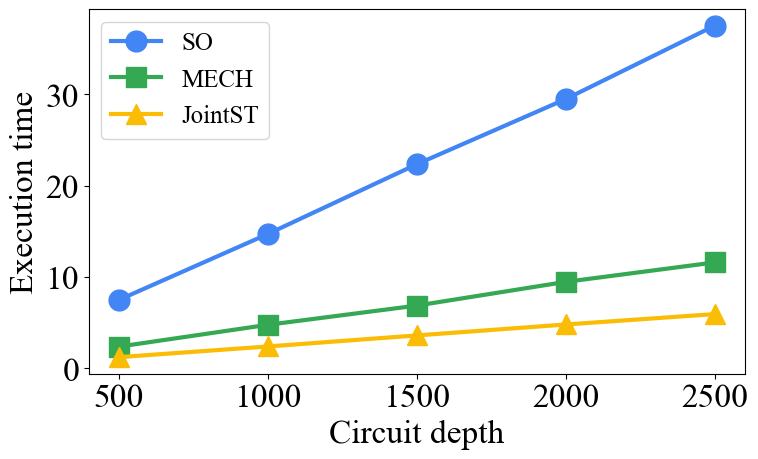

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 全局参数
plt.rcParams.update({
    'font.size': 20,
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'svg.fonttype': 'none'
})

# 配色与标记参数
colors    = ['#4285f4', '#34a853', '#fbbc05']  # 分别对应 swap, greedy, optimal
markers   = ['o', 's', '^']                   # 分别使用：圆圈、方块、三角
scheme_names = ['SO', 'MECH', 'JointST']

# 示例数据（请替换成你的真实数据）
x = np.arange(5)
x_labels = ['500', '1000', '1500', '2000', '2500']
def get_noise():
    return random.uniform(0.98, 1.02)


vals_list = [
    [val * get_noise() for val in [7.4211447811 * i for i in range(1,6)]],  # SS
    [val * get_noise() for val in [2.3245791246 * i for i in range(1,6)]],  # OGS
    [val * get_noise() for val in [1.1964903906 * i for i in range(1,6)]],  # SHSQC
]

# 创建画布和单个子图
fig, ax = plt.subplots(figsize=(8, 5))

# 绘制折线，按 scheme 分配颜色和标记
for i, vals in enumerate(vals_list):
    ax.plot(
        x, vals,
        color=colors[i],
        marker=markers[i], markersize=15,
        linestyle='-', linewidth=3,
        label=scheme_names[i]
    )

# 坐标和标签
ax.set_xlabel('Circuit depth', fontsize=24)
ax.set_ylabel('Execution time', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=24)

# 科学计数法格式化
# ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
# ax.yaxis.get_major_formatter().set_scientific(True)
# ax.yaxis.get_major_formatter().set_powerlimits((0, 0))
ax.tick_params(axis='both', which='major', labelsize=24)

# 图例
ax.legend(loc='upper left', fontsize=18)

plt.tight_layout()

# 保存与展示
fig_name = './fig/circuit_depth_vs_time.pdf'
plt.savefig(fig_name, format='pdf', bbox_inches='tight')
plt.show()
